In [30]:
import pandas as pd 
import numpy as np 

In [31]:
raw_film = pd.read_csv('film.csv')
film = pd.read_csv('film.csv')

In [32]:
film.head()

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s27,X-Men: Dark Phoenix,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...","United States, Canada",2019,PG-13,115 min,"Action-Adventure, Family, Science Fiction",When Jean Grey transforms into the Dark Phoeni...
1,s165,The Kid Who Would Be King,Joe Cornish,"Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...","United Kingdom, United States",2019,PG,121 min,"Action-Adventure, Coming of Age, Family","When a kid discovers the legendary sword, Exca..."
2,s194,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...
3,s222,Disney My Music Story: Yoshiki,Kentaro Takayanagi,YOSHIKI,"United States, Japan",2019,TV-PG,48 min,"Biographical, Documentary, Music",Yoshiki from â€œX Japanâ€ performs two Disney...
4,s241,Great Shark Chow Down,Mark Woodward,Dan Nachtrab,NaN,2019,TV-PG,45 min,"Animals & Nature, Documentary",Great Shark Chow Down â€“ prepare for a feast ...


In [33]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       60 non-null     object
 1   title         60 non-null     object
 2   director      50 non-null     object
 3   cast          54 non-null     object
 4   country       53 non-null     object
 5   release_year  60 non-null     int64 
 6   rating        59 non-null     object
 7   duration      60 non-null     object
 8   listed_in     60 non-null     object
 9   description   60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


In [34]:
film.isnull().sum()

show_id          0
title            0
director        10
cast             6
country          7
release_year     0
rating           1
duration         0
listed_in        0
description      0
dtype: int64

In [35]:
film[film['director'].isnull()]

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
5,s265,Man vs. Shark,NaN,"Jeremiah Sullivan, Dave Hoffman",United States,2019,TV-PG,45 min,"Animals & Nature, Documentary",Marine biologist attempts to get bitten by a d...
9,s313,Oil Spill of The Century,NaN,LoÃ¯ck Peyron,NaN,2019,TV-PG,45 min,"Documentary, Historical",LoÃ¯ck Peyron investigates the 1978 Amoco Cadi...
12,s366,Star Wars: Galaxy's Edge-Adventure Awaits,NaN,"Neil Harris, Kaley Cuoco, Oscar Isaac, Sarah H...",United States,2019,TV-PG,81 min,"Documentary, Family",Celebrating Disneyâ€™s new land that brings St...
13,s393,Lost City of Machu Picchu,NaN,Craig Sechler,United States,2019,TV-14,44 min,"Documentary, Family",Who were the mysterious people who built Machu...
15,s440,Women Of Impact: Changing The World,NaN,Julianna Margulies,United States,2019,TV-PG,44 min,"Documentary, Historical",How will you make the world a better place? He...
27,s594,Marvel Rising: Battle of The Bands,NaN,"Dee Baker, Dove Cameron, Skai Jackson, Kathree...",United States,2019,TV-Y7,23 min,"Action-Adventure, Animation, Superhero",Gwen (Ghost-Spider) has to defeat Screaming Mi...
37,s620,Marvel Rising: Chasing Ghosts,NaN,"Dee Baker, Chloe Bennet, Dove Cameron, Skai Ja...",United States,2019,TV-Y7-FV,24 min,"Action-Adventure, Animation, Superhero",Ghost-Spider teams up with the Secret Warriors.
38,s621,Marvel Rising: Heart of Iron,NaN,"Dee Baker, Chloe Bennet, Dove Cameron, Robbie ...",United States,2019,TV-Y7,46 min,"Action-Adventure, Animation, Coming of Age",Ironheart joins the Secret Warriors to defend ...
42,s632,"Happy Birthday, Mickey!",NaN,NaN,NaN,2019,TV-G,2 min,"Animation, Comedy, Dance","Celebrating Mickey, the worldâ€™s most beloved..."
53,s963,Marvel Studios: Expanding the Universe,NaN,NaN,NaN,2019,TV-PG,13 min,"Documentary, Family",An exciting look into the future of Marvel Stu...


In [36]:
film.loc[film['title']=='Oil Spill of The Century', 'director'] = "Josselin Mahot, Fabrice Gardel"
film.loc[film['title']=="Star Wars: Galaxy's Edge-Adventure Awaits", 'director'] = "Christian Lamb"
film.loc[film['title']=="Women Of Impact: Changing The World", 'director'] = 'Lisa Feit'
film.loc[film['title']=='Marvel Rising: Battle of The Bands', 'director'] = 'Chris Rutkowski'
film.loc[film['title']=='Marvel Rising: Chasing Ghosts', 'director'] = 'Alfred Gimeno'
film.loc[film['title']=='Marvel Rising: Heart of Iron', 'director'] = 'Sol Choi, Alfred Gimeno'
# source: IMDB

In [37]:
film[film['cast'].isnull()]

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description
35,s614,One Day at Disney,Fritz Mitchell,NaN,United States,2019,TV-PG,62 min,"Documentary, Family",Discover the inspiring personal stories of the...
42,s632,"Happy Birthday, Mickey!",NaN,NaN,NaN,2019,TV-G,2 min,"Animation, Comedy, Dance","Celebrating Mickey, the worldâ€™s most beloved..."
49,s891,Into the Grand Canyon,Pete McBride,NaN,United States,2019,TV-PG,82 min,"Action-Adventure, Animals & Nature, Documentary",Two friends set out to traverse the Grand Cany...
51,s920,Kitbull,Rosana Sullivan,NaN,United States,2019,PG,9 min,"Animation, Buddy, Comedy",An unlikely connection between a kitten and a ...
53,s963,Marvel Studios: Expanding the Universe,NaN,NaN,NaN,2019,TV-PG,13 min,"Documentary, Family",An exciting look into the future of Marvel Stu...
58,s1125,Smash and Grab,Brian Larsen,NaN,United States,2019,PG,8 min,"Animation, Buddy, Family",Two antiquated robots risk everything for free...


In [38]:
film['duration'] = film['duration'].apply(lambda x: int(x.split()[0]))

In [39]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       60 non-null     object
 1   title         60 non-null     object
 2   director      56 non-null     object
 3   cast          54 non-null     object
 4   country       53 non-null     object
 5   release_year  60 non-null     int64 
 6   rating        59 non-null     object
 7   duration      60 non-null     int64 
 8   listed_in     60 non-null     object
 9   description   60 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.8+ KB


In [40]:
film['rating'].value_counts()

rating
TV-PG       20
TV-G        13
PG          12
PG-13        4
G            4
TV-Y7        4
TV-14        1
TV-Y7-FV     1
Name: count, dtype: int64

In [41]:
list_of_genres = []
for genres in list(film['listed_in'].unique()):
    for genre in genres.split(','):
        if genre.strip() not in list_of_genres:
            list_of_genres.append(genre.strip())

for genre in list_of_genres:
    film[genre] = film['listed_in'].str.contains(genre)

In [42]:
film.isnull().sum()

show_id             0
title               0
director            4
cast                6
country             7
release_year        0
rating              1
duration            0
listed_in           0
description         0
Action-Adventure    0
Family              0
Science Fiction     0
Coming of Age       0
Biographical        0
Documentary         0
Music               0
Animals & Nature    0
Historical          0
Fantasy             0
Animation           0
Comedy              0
Musical             0
Drama               0
Superhero           0
Concert Film        0
Dance               0
Buddy               0
dtype: int64

In [43]:
film.loc[film['title']=='Disney My Music Story: Perfume','rating'] = 'TV-14'

# from IMDB

In [44]:
film.isnull().sum()

show_id             0
title               0
director            4
cast                6
country             7
release_year        0
rating              0
duration            0
listed_in           0
description         0
Action-Adventure    0
Family              0
Science Fiction     0
Coming of Age       0
Biographical        0
Documentary         0
Music               0
Animals & Nature    0
Historical          0
Fantasy             0
Animation           0
Comedy              0
Musical             0
Drama               0
Superhero           0
Concert Film        0
Dance               0
Buddy               0
dtype: int64

In [45]:
film[film['country'].isnull()]

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,...,Historical,Fantasy,Animation,Comedy,Musical,Drama,Superhero,Concert Film,Dance,Buddy
2,s194,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2019,TV-14,53,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...,...,False,False,False,False,False,False,False,False,False,False
4,s241,Great Shark Chow Down,Mark Woodward,Dan Nachtrab,NaN,2019,TV-PG,45,"Animals & Nature, Documentary",Great Shark Chow Down â€“ prepare for a feast ...,...,False,False,False,False,False,False,False,False,False,False
7,s289,Ultimate Viking Sword,Peter Yost,Jay Sanders,NaN,2019,TV-PG,45,"Documentary, Historical","National Geographic reconstructs the Ulfberht,...",...,True,False,False,False,False,False,False,False,False,False
9,s313,Oil Spill of The Century,"Josselin Mahot, Fabrice Gardel",LoÃ¯ck Peyron,NaN,2019,TV-PG,45,"Documentary, Historical",LoÃ¯ck Peyron investigates the 1978 Amoco Cadi...,...,True,False,False,False,False,False,False,False,False,False
14,s433,Chasing the Equinox,Kenny Scott,Stefan Frank,NaN,2019,TV-PG,45,Documentary,Ancient civilizations shared an incredible kno...,...,False,False,False,False,False,False,False,False,False,False
42,s632,"Happy Birthday, Mickey!",NaN,NaN,NaN,2019,TV-G,2,"Animation, Comedy, Dance","Celebrating Mickey, the worldâ€™s most beloved...",...,False,False,True,True,False,False,False,False,True,False
53,s963,Marvel Studios: Expanding the Universe,NaN,NaN,NaN,2019,TV-PG,13,"Documentary, Family",An exciting look into the future of Marvel Stu...,...,False,False,False,False,False,False,False,False,False,False


In [46]:
film.loc[film['title'].isin(['Disney My Music Story: Perfume', 'Great Shark Chow Down', 'Marvel Studios: Expanding the Universe']),'country'] = 'United States'

In [47]:
film[film['country'].isnull()]

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,...,Historical,Fantasy,Animation,Comedy,Musical,Drama,Superhero,Concert Film,Dance,Buddy
7,s289,Ultimate Viking Sword,Peter Yost,Jay Sanders,NaN,2019,TV-PG,45,"Documentary, Historical","National Geographic reconstructs the Ulfberht,...",...,True,False,False,False,False,False,False,False,False,False
9,s313,Oil Spill of The Century,"Josselin Mahot, Fabrice Gardel",LoÃ¯ck Peyron,NaN,2019,TV-PG,45,"Documentary, Historical",LoÃ¯ck Peyron investigates the 1978 Amoco Cadi...,...,True,False,False,False,False,False,False,False,False,False
14,s433,Chasing the Equinox,Kenny Scott,Stefan Frank,NaN,2019,TV-PG,45,Documentary,Ancient civilizations shared an incredible kno...,...,False,False,False,False,False,False,False,False,False,False
42,s632,"Happy Birthday, Mickey!",NaN,NaN,NaN,2019,TV-G,2,"Animation, Comedy, Dance","Celebrating Mickey, the worldâ€™s most beloved...",...,False,False,True,True,False,False,False,False,True,False


In [48]:
film[film['cast'].isnull()]

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,...,Historical,Fantasy,Animation,Comedy,Musical,Drama,Superhero,Concert Film,Dance,Buddy
35,s614,One Day at Disney,Fritz Mitchell,NaN,United States,2019,TV-PG,62,"Documentary, Family",Discover the inspiring personal stories of the...,...,False,False,False,False,False,False,False,False,False,False
42,s632,"Happy Birthday, Mickey!",NaN,NaN,NaN,2019,TV-G,2,"Animation, Comedy, Dance","Celebrating Mickey, the worldâ€™s most beloved...",...,False,False,True,True,False,False,False,False,True,False
49,s891,Into the Grand Canyon,Pete McBride,NaN,United States,2019,TV-PG,82,"Action-Adventure, Animals & Nature, Documentary",Two friends set out to traverse the Grand Cany...,...,False,False,False,False,False,False,False,False,False,False
51,s920,Kitbull,Rosana Sullivan,NaN,United States,2019,PG,9,"Animation, Buddy, Comedy",An unlikely connection between a kitten and a ...,...,False,False,True,True,False,False,False,False,False,True
53,s963,Marvel Studios: Expanding the Universe,NaN,NaN,United States,2019,TV-PG,13,"Documentary, Family",An exciting look into the future of Marvel Stu...,...,False,False,False,False,False,False,False,False,False,False
58,s1125,Smash and Grab,Brian Larsen,NaN,United States,2019,PG,8,"Animation, Buddy, Family",Two antiquated robots risk everything for free...,...,False,False,True,False,False,False,False,False,False,True


In [49]:
film

,show_id,title,director,cast,country,release_year,rating,duration,listed_in,description,...,Historical,Fantasy,Animation,Comedy,Musical,Drama,Superhero,Concert Film,Dance,Buddy
0,s27,X-Men: Dark Phoenix,Simon Kinberg,"James McAvoy, Michael Fassbender, Jennifer Law...","United States, Canada",2019,PG-13,115,"Action-Adventure, Family, Science Fiction",When Jean Grey transforms into the Dark Phoeni...,...,False,False,False,False,False,False,False,False,False,False
1,s165,The Kid Who Would Be King,Joe Cornish,"Louis Ashbourne Serkis, Tom Taylor, Rebecca Fe...","United Kingdom, United States",2019,PG,121,"Action-Adventure, Coming of Age, Family","When a kid discovers the legendary sword, Exca...",...,False,False,False,False,False,False,False,False,False,False
2,s194,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",United States,2019,TV-14,53,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...,...,False,False,False,False,False,False,False,False,False,False
3,s222,Disney My Music Story: Yoshiki,Kentaro Takayanagi,YOSHIKI,"United States, Japan",2019,TV-PG,48,"Biographical, Documentary, Music",Yoshiki from â€œX Japanâ€ performs two Disney...,...,False,False,False,False,False,False,False,False,False,False
4,s241,Great Shark Chow Down,Mark Woodward,Dan Nachtrab,United States,2019,TV-PG,45,"Animals & Nature, Documentary",Great Shark Chow Down â€“ prepare for a feast ...,...,False,False,False,False,False,False,False,False,False,False
5,s265,Man vs. Shark,NaN,"Jeremiah Sullivan, Dave Hoffman",United States,2019,TV-PG,45,"Animals & Nature, Documentary",Marine biologist attempts to get bitten by a d...,...,False,False,False,False,False,False,False,False,False,False
6,s288,Petra: Secrets of the Ancient Builders,"Thierry Fessard, Yohann Thiriet",Bert Morris,United Arab Emirates,2019,TV-G,45,"Documentary, Historical","Discover the technical prowess behind Petra, a...",...,True,False,False,False,False,False,False,False,False,False
7,s289,Ultimate Viking Sword,Peter Yost,Jay Sanders,NaN,2019,TV-PG,45,"Documentary, Historical","National Geographic reconstructs the Ulfberht,...",...,True,False,False,False,False,False,False,False,False,False
8,s304,Pompeii: Secrets Of The Dead,Ben Finney,Maite Jauregui,United States,2019,TV-PG,45,"Documentary, Historical",Forensic experts scan Pompeiiâ€™s victims to i...,...,True,False,False,False,False,False,False,False,False,False
9,s313,Oil Spill of The Century,"Josselin Mahot, Fabrice Gardel",LoÃ¯ck Peyron,NaN,2019,TV-PG,45,"Documentary, Historical",LoÃ¯ck Peyron investigates the 1978 Amoco Cadi...,...,True,False,False,False,False,False,False,False,False,False


In [50]:
film_rating = film[['rating']]
film_rating_pd = pd.DataFrame(film_rating.value_counts('rating'))

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

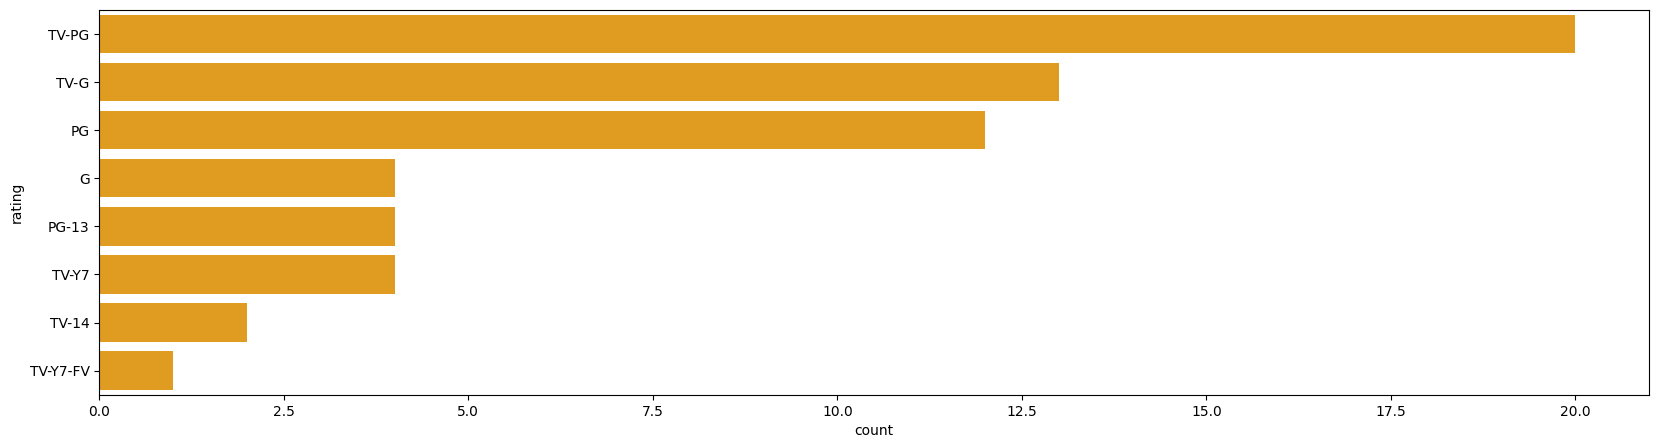

In [52]:
plt.figure(figsize=(20, 5))
by_rating = sns.barplot(x='count', y= 'rating', data=film_rating_pd, color='orange')
plt.show()

In [53]:
film.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'Action-Adventure',
       'Family', 'Science Fiction', 'Coming of Age', 'Biographical',
       'Documentary', 'Music', 'Animals & Nature', 'Historical', 'Fantasy',
       'Animation', 'Comedy', 'Musical', 'Drama', 'Superhero', 'Concert Film',
       'Dance', 'Buddy'],
      dtype='object')

In [54]:
category = ['Action-Adventure',
       'Family', 'Science Fiction', 'Coming of Age', 'Biographical',
       'Documentary', 'Music', 'Animals & Nature', 'Historical', 'Fantasy',
       'Animation', 'Comedy', 'Musical', 'Drama', 'Superhero', 'Concert Film',
       'Dance', 'Buddy']
my_dict = dict()
count = []
for x in category:
     if x == "Musical":
          count[6] += film[film[x] == True][x].size
     else:
          count.append(film[film[x] == True][x].size)
category = ['Action-Adventure',
       'Family', 'Science Fiction', 'Coming of Age', 'Biographical',
       'Documentary', 'Music', 'Animals & Nature', 'Historical', 'Fantasy',
       'Animation', 'Comedy', 'Drama', 'Superhero', 'Concert Film',
       'Dance', 'Buddy']
my_dict['Category'] = category
my_dict['Count'] = count

category_count = pd.DataFrame(my_dict)
category_count

,Category,Count
0,Action-Adventure,21
1,Family,29
2,Science Fiction,4
3,Coming of Age,8
4,Biographical,2
5,Documentary,24
6,Music,4
7,Animals & Nature,6
8,Historical,9
9,Fantasy,9


C:\Users\Kien\AppData\Local\Temp\ipykernel_18948\3764683107.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  by_category.set_xticklabels(category_count['Category'], rotation = 50)


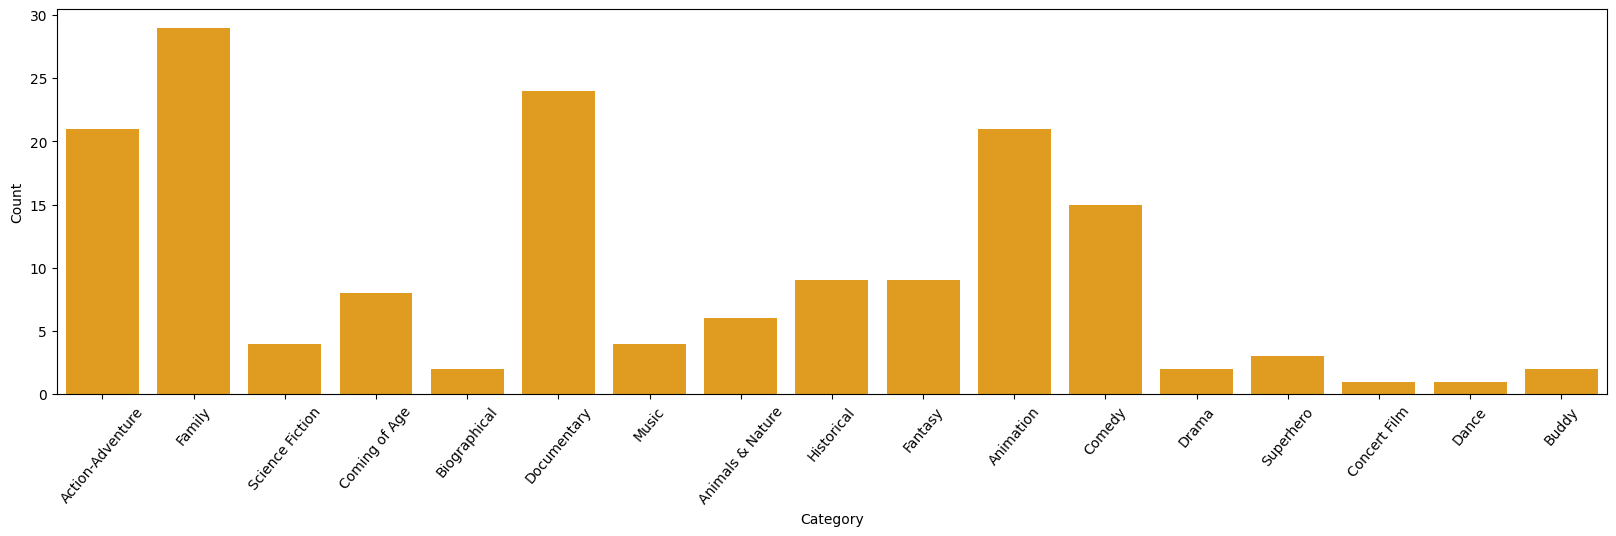

In [55]:
plt.figure(figsize=(20, 5))
by_category = sns.barplot(x='Category', y='Count', data=category_count, color='orange')
by_category.set_xticklabels(category_count['Category'], rotation = 50)
plt.show()